In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger") #For the pos (part of speech)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chirif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chirif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chirif\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
df = pd.read_csv("bbc_text_cls.csv")

In [4]:
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [5]:
inputs = df["Text"]
labels = df["Category"]

<AxesSubplot:>

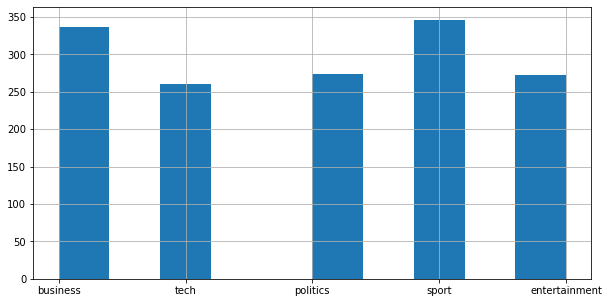

In [6]:
labels.hist(figsize=(10,5))

In [7]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs,labels,random_state=123)

In [8]:
vectorizer = CountVectorizer()

In [9]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [10]:
Xtrain

<1117x22064 sparse matrix of type '<class 'numpy.int64'>'
	with 225849 stored elements in Compressed Sparse Row format>

In [11]:
(Xtrain != 0).sum()

225849

In [12]:
(Xtrain != 0).sum()/np.prod(Xtrain.shape)

0.009163908622949564

In [13]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9946284691136974
test score: 0.9705093833780161


In [14]:
vectorizer = CountVectorizer(stop_words="english")
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.fit_transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9955237242614146


ValueError: dimension mismatch

In [15]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [23]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        word_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
               for word, tag in words_and_tags]

In [24]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

NameError: name 'words_and_tags' is not defined

In [18]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [19]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9928379588182632
test score: 0.9731903485254692


In [20]:
def simple_tokenizer(s):
    return s.split()

In [25]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9937332139659804
test score: 0.9731903485254692
